In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
#from pygam.utils import generate_X_grid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from pygam import LinearGAM
import seaborn as sns
import matplotlib.pyplot as plt 
df=pd.read_csv('compresive_strength_concrete.csv')

In [10]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [2]:
df.columns=['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.iteritems()

<generator object DataFrame.iteritems at 0x294af54d0>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

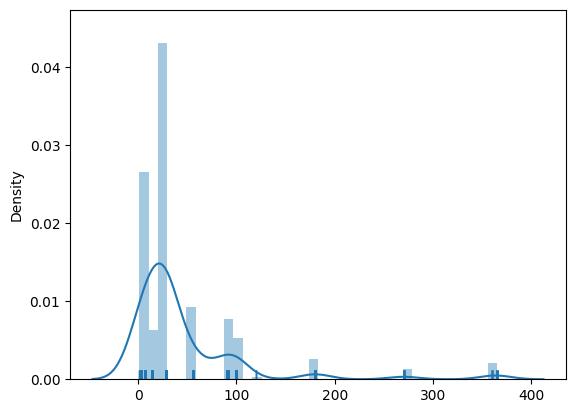

In [6]:
sns.distplot(df.Age.values,rug=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

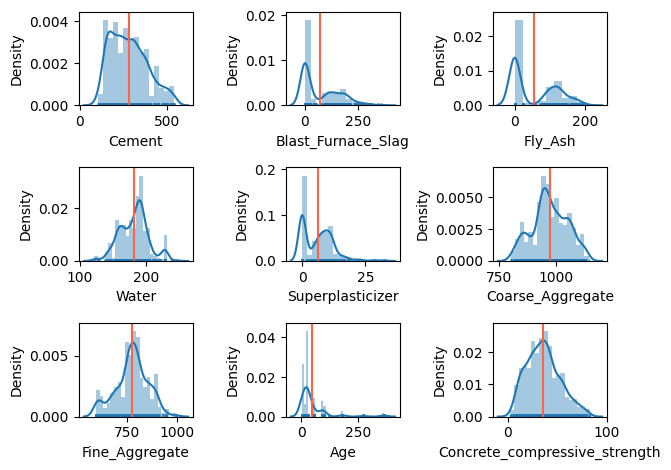

In [8]:
rows=3
cols=3

for index,(colsname,serie) in enumerate(df.iteritems()):
    plt.subplot(rows,cols,index+1)
    sns.distplot(serie,rug=True)
    plt.axvline(np.mean(serie),color='tomato')
    plt.tight_layout()

In [9]:
df.head(5)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength'],
      dtype='object')

In [11]:
xcols=['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age']
X=df[xcols]
y=df.Concrete_compressive_strength
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=11238)
scaler=StandardScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)
linearGAM=LinearGAM().fit(Xtrain,ytrain)

In [12]:
ypred=linearGAM.predict(Xtest)

In [13]:
np.sqrt(mean_squared_error(ytest,ypred))

5.544793213152419

In [14]:
linearGAM.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     80.2121
Link Function:                     IdentityLink Log Likelihood:                                 -3043.3317
Number of Samples:                          721 AIC:                                             6249.0876
                                                AICc:                                            6269.9916
                                                GCV:                                               33.3179
                                                Scale:                                             26.7201
                                                Pseudo R-Squared:                                   0.9151
Feature Function                  Lam

/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_14655/474004105.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  linearGAM.summary()


In [18]:
lam = np.logspace(-3, 3, 3)
lams = [lam] * 8
linearGAM.gridsearch(Xtrain, ytrain, lam=lams)

  0% (62 of 6561) |                      | Elapsed Time: 0:00:15 ETA:   0:26:52/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pygam/pygam.py:225: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (self.terms is not 'auto') and not (isinstance(self.terms, (TermList, Term, type(None)))):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pygam/pygam.py:276: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.terms is 'auto':
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pygam/pygam.py:225: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (self.terms is not 'auto') and not (isinstance(self.terms, (TermList, Term, type(None)))):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pygam/pygam.py:276: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.terms is 'auto':
/Library/Frameworks/Python.framework/Versions/3

KeyboardInterrupt: 